In [247]:
urge_debt = """
sentence = 介绍 问责 威胁 
介绍 = 招呼 头衔 
招呼 = 先生你好 | 女士你好 | 你好
头衔 = 引入 公司 
引入 = 我这边是 | 这里是 | 我来自
公司 = 长颈鹿金融公司。 | 大猩猩贷款集团。 | 非洲豹风控分部。 | 小青龙借贷中心。 | 皮皮猪贷款平台。
问责 = 证据 欠款  
证据 = 资料显示 | 证据表明 | 我们查到
欠款 = 说明 金额 天数 
说明 = 你欠了我们 | 你的欠款是 | 你需要还给我们
金额 = 十万， | 一百万， | 两千万， | 两毛钱，
天数 = 已经十天了。 | 都过去一年了。 | 逾期时间两年。
威胁 = 威逼 | 利诱
威逼 = 诘问 手段 暴力
诘问 = 你怎么回事？ | 还能不能还钱了？ | 有钱花没钱还吗？
手段 = 信不信扣你征信分？ |  等会给你妈打电话！  |  我知道你住在哪！
暴力 =  就问你怕不怕！ | 赶紧给我还钱！
利诱 = 时间 奖励 温柔
时间 = 现在还钱 | 即刻还款 | 马上结清款项
奖励 = 诱导 项目 
诱导 = 有机会获得 | 可以抽取 | 可以领取
项目 = 精神病院一日游哦。 | 终身残障协会会员哦。 | 一套人工智障课程哈。
温柔 = 你看怎么样? | 考虑一下呗~ | 这一波怎么说?
"""

In [94]:
refuse_money = """
sentence = 扯皮 | 硬刚
扯皮 = 语气 道歉 理由 自夸 动作
语气 = 哎呀！ | 哦哦哦！ | 噢哟！
道歉 = 不好意思兄弟， |  实在对不住， | 真是对不起，
理由 = 这段时间忙不小心给忘了。 | 前段时间去南极出差给耽搁了。 | 我在马里亚纳这里没WIFI。
自夸 = 鄙人家财万贯 | 我乃名门之后， | 不过我这个人最讲诚信了，
动作 = 我马上就还你！ |  稍等片刻给你打钱。  |  等会就去处理这笔款项。
硬刚 = 不屑 蛮横 说谎 耍赖
不屑 = 呸！ |  滚！ | 一边去！
蛮横 = 骗子！ |  脑残吧你！  | 哪里来的傻逼！
说谎 = 在下从不欠钱。 |  你打错了。  |  不懂你在说什么。
耍赖 = 我挂了。 |  我报警了。  |  我还有事。
"""

In [227]:
import random 

def create_grammar(grammar_str, split = '=', line_split = '\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split("|")]
    return grammar

choice = random.choice

def generate_n(gram,target,n=1):
    if n ==1:
        if target not in gram:
            return target
        expanded = [generate(gram,t) for t in choice(gram[target])]
        return ''.join([e for e in expanded])
    else:
        for i in range(n):
            if target not in gram:
                return target
            expanded = [generate(gram,t) for t in choice(gram[target])]
            print(''.join([e for e in expanded]))

In [229]:
generate_n(gram = urge, target = 'sentence',n=3)

女士你好我来自大猩猩贷款集团。我们查到你需要还给我们一百万，逾期时间两年。你怎么回事？信不信扣你征信分？就问你怕不怕！
你好这里是皮皮猪贷款平台。我们查到你欠了我们十万，逾期时间两年。即刻还款可以领取一套人工智障课程哈。这一波怎么说
女士你好我这边是小青龙借贷中心。证据表明你欠了我们两毛钱，已经十天了。现在还钱可以抽取一套人工智障课程哈。考虑一下呗


In [249]:
urge = create_grammar(urge_debt)
refuse = create_grammar(refuse_money)
for i in range(10):
    print(generate_n(gram = urge, target = 'sentence',n=1))
    print(generate_n(gram = refuse, target = 'sentence',n=1))
    print('-*-*'*30)

你好这里是长颈鹿金融公司。证据表明你的欠款是两毛钱，已经十天了。现在还钱有机会获得精神病院一日游哦。考虑一下呗~
呸！脑残吧你！你打错了。我还有事。
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
先生你好我来自大猩猩贷款集团。资料显示你欠了我们两毛钱，都过去一年了。马上结清款项可以领取精神病院一日游哦。这一波怎么说?
哎呀！不好意思兄弟，前段时间去南极出差给耽搁了。不过我这个人最讲诚信了，等会就去处理这笔款项。
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
先生你好这里是非洲豹风控分部。证据表明你欠了我们十万，逾期时间两年。还能不能还钱了？我知道你住在哪！就问你怕不怕！
哎呀！不好意思兄弟，前段时间去南极出差给耽搁了。鄙人家财万贯我马上就还你！
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
你好这里是小青龙借贷中心。我们查到你需要还给我们一百万，都过去一年了。还能不能还钱了？我知道你住在哪！赶紧给我还钱！
呸！脑残吧你！在下从不欠钱。我挂了。
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
女士你好我这边是大猩猩贷款集团。资料显示你的欠款是一百万，都过去一年了。即刻还款可以领取一套人工智障课程哈。考虑一下呗~
噢哟！不好意思兄弟，这段时间忙不小心给忘了。鄙人家财万贯等会就去处理这笔款项。
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

In [105]:
import pandas as pd
filename1 = 'movie_comments.csv'
filename2 = 'train.txt'

In [140]:
content1 = pd.read_csv(filename1,encoding = 'utf-8',error_bad_lines=False)
content1.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [107]:
content2 = pd.read_csv(filename2,names ='c',error_bad_lines=False)
content2.head()

,c
0,0 ++$++ disability-insurance ++$++ 法律要求残疾保险吗？ ...
1,1 ++$++ life-insurance ++$++ 债权人可以在死后人寿保险吗？ ++...
2,2 ++$++ renters-insurance ++$++ 旅行者保险有租赁保险吗？ +...
3,3 ++$++ auto-insurance ++$++ 我可以开一辆没有保险的新车吗？ +...
4,4 ++$++ life-insurance ++$++ 人寿保险的现金转出价值是否应纳税？...


In [141]:
articles1 = content1['comment'].tolist()

In [110]:
len(articles1)

261497

In [111]:
articles2 = content2['c'].tolist()
len(articles2)

12889

In [123]:
import re

def token(string):
    return re.findall('\w+',string)
def chinese(string):
    return re.sub("[A-Za-z0-9\!\%\[\]\,\。]", "", string)

In [125]:
''.join(token(articles1[0]))

'吴京意淫到了脑残的地步看了恶心想吐'

In [124]:
chinese(''.join(token(articles2[0])))

'法律要求残疾保险吗'

In [142]:
articles1_clean = [''.join(token(str(a))) for a in articles1]
articles1_clean[0]

'吴京意淫到了脑残的地步看了恶心想吐'

In [127]:
articles2_clean = [chinese(''.join(token(str(a)))) for a in articles2]
articles2_clean[0]

'法律要求残疾保险吗'

In [128]:
print(len(articles1_clean),len(articles2_clean))

261497 12889


In [149]:
with open('movie.txt','w',encoding = 'utf-8') as f:
    for a in articles1_clean:
        f.write(str(a) + '\n')    

with open('insurance.txt','w',encoding = 'utf-8') as fi:
    for a in articles2_clean:
        fi.write(str(a) + '\n') 
#.encode('gb18030')
#.encode('utf-8')

In [145]:
import jieba

def cut(string):
    return list(jieba.cut(string))

In [172]:
token1_ = []
token2_ = []

for i, line in enumerate((open('movie.txt',encoding = 'utf-8'))):
    token1_ += cut(line.rstrip('\n'))

for i, line in enumerate((open('insurance.txt',encoding = 'utf-8'))):
    token2_ += cut(line.rstrip('\n'))

In [173]:
token1_[:10]

['吴京', '意淫', '到', '了', '脑残', '的', '地步', '看', '了', '恶心']

In [174]:
token2_[:10]

['法律', '要求', '残疾', '保险', '吗', '债权人', '可以', '在', '死', '后']

In [175]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [177]:
words_count_1 = Counter(token1_)
words_count_2 = Counter(token2_)
print(words_count_1.most_common(5))
print(words_count_2.most_common(5))

[('的', 328262), ('了', 102420), ('是', 73106), ('我', 50338), ('都', 36255)]
[('保险', 5013), ('的', 3219), ('人寿保险', 2961), ('什么', 2677), ('吗', 2479)]


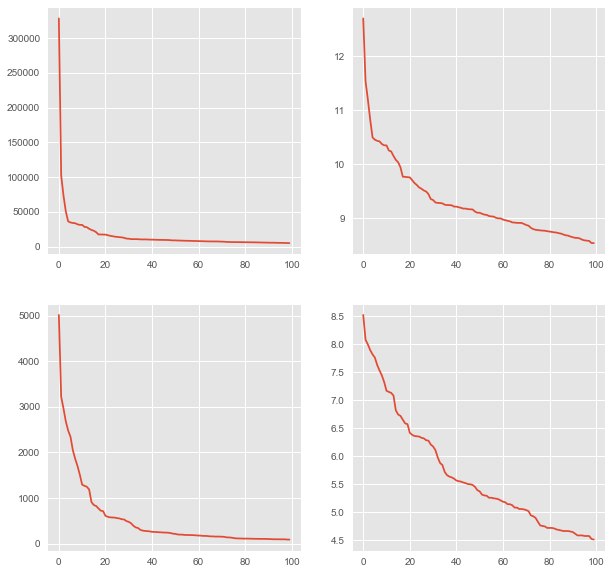

In [189]:
freq1 = [f for w,f in words_count_1.most_common(100)]
freq2 = [f for w,f in words_count_2.most_common(100)]
x = [i for i in range(100)]

plt.figure(figsize = (10,10))
plt.style.use('ggplot')

plt.subplot(221)
plt.plot(x,freq1)
plt.subplot(222)
plt.plot(x,np.log(freq1))
plt.subplot(223)
plt.plot(x,freq2)
plt.subplot(224)
plt.plot(x,np.log(freq2))

In [196]:
def prob_1(category,word):
    if category == 1:
        return words_count_1[word]/len(token1_)
    else:
        return words_count_2[word]/len(token2_)

token1_2gram = [''.join(token1_[i:i+2]) for i in range(len(token1_[:-2]))]
token2_2gram = [''.join(token2_[i:i+2]) for i in range(len(token2_[:-2]))]

words_count_1_2gram = Counter(token1_2gram)
words_count_2_2gram = Counter(token2_2gram)

def prob_2(category,word1,word2):
    if category == 1:
        if word1 + word2 in words_count_1_2gram:
            return words_count_1_2gram[word1 + word2]/len(token1_2gram)
        else:
            return 1/len(token1_2gram)
    else:
        if word1 + word2 in words_count_2_2gram:
            return words_count_2_2gram[word1 + word2]/len(token2_2gram)
        else:
            return 1/len(token2_2gram)

In [207]:
print(prob_1(1,'我'),'\n',
prob_1(2,'我'),'\n',
prob_2(1,'我们','的'),'\n',
prob_2(2,'我们','的'))

0.011210354378414155 
 0.027602449364107395 
 0.00013807506874245458 
 0.00017495928831944875


In [209]:
def get_prob(n,sentence):
    words = cut(sentence)
    sentence_prob = 1
    for i,word in enumerate(words[:-1]):
        next_ = words[i+1]
        prob = prob_2(n,word,next_)
        sentence_prob *= prob
    return sentence_prob

In [211]:
print(get_prob(1,'今天天气不错'),'\n',
      get_prob(2,'今天天气不错'),'\n',
      get_prob(1,'晚上去吃火锅'),'\n',
      get_prob(2,'晚上去吃火锅'),'\n')

2.2270172377815255e-07 
 1.345840679380375e-05 
 1.9838423109504223e-13 
 1.8112871342750291e-10 



In [255]:
for sen in [generate_n(gram=urge,target='sentence',n=1) for i in range(5)]:
    print('sentence: {} \n Prob: {}'.format(sen,get_prob(1,sen)))
print("-*-"*40)
for sen in [generate_n(gram=urge,target='sentence',n=1) for i in range(5)]:
    print('sentence: {} \n Prob: {}'.format(sen,get_prob(2,sen)))

sentence: 你好这里是小青龙借贷中心。我们查到你需要还给我们一百万，都过去一年了。有钱花没钱还吗？等会给你妈打电话！赶紧给我还钱！ 
 Prob: 2.8491429810125716e-243
sentence: 先生你好这里是大猩猩贷款集团。资料显示你欠了我们十万，都过去一年了。有钱花没钱还吗？信不信扣你征信分？赶紧给我还钱！ 
 Prob: 2.8665802141883803e-242
sentence: 先生你好我这边是非洲豹风控分部。我们查到你欠了我们十万，逾期时间两年。即刻还款可以抽取精神病院一日游哦。这一波怎么说? 
 Prob: 1.5520082917631876e-205
sentence: 先生你好我这边是小青龙借贷中心。我们查到你欠了我们十万，都过去一年了。你怎么回事？等会给你妈打电话！赶紧给我还钱！ 
 Prob: 9.869010765198616e-230
sentence: 先生你好我这边是小青龙借贷中心。证据表明你欠了我们一百万，逾期时间两年。即刻还款可以抽取一套人工智障课程哈。这一波怎么说? 
 Prob: 2.2456189716875216e-223
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
sentence: 你好我来自小青龙借贷中心。资料显示你需要还给我们十万，已经十天了。你怎么回事？信不信扣你征信分？就问你怕不怕！ 
 Prob: 4.877016805486866e-160
sentence: 先生你好这里是非洲豹风控分部。证据表明你欠了我们一百万，已经十天了。即刻还款有机会获得一套人工智障课程哈。这一波怎么说? 
 Prob: 1.4585972468546548e-165
sentence: 你好我这边是皮皮猪贷款平台。证据表明你需要还给我们两毛钱，逾期时间两年。马上结清款项有机会获得精神病院一日游哦。考虑一下呗~ 
 Prob: 6.56368761084595e-165
sentence: 你好我这边是皮皮猪贷款平台。证据表明你的欠款是十万，逾期时间两年。即刻还款有机会获得精神病院一日游哦。这一波怎么说?

In [256]:
for sen in [generate_n(gram=refuse,target='sentence',n=1) for i in range(5)]:
    print('sentence: {} \n Prob: {}'.format(sen,get_prob(1,sen)))
print("-*-"*40)
for sen in [generate_n(gram=refuse,target='sentence',n=1) for i in range(5)]:
    print('sentence: {} \n Prob: {}'.format(sen,get_prob(2,sen)))

sentence: 滚！骗子！在下从不欠钱。我报警了。 
 Prob: 4.762477333596799e-79
sentence: 哦哦哦！不好意思兄弟，这段时间忙不小心给忘了。鄙人家财万贯稍等片刻给你打钱。 
 Prob: 3.5304448305249703e-130
sentence: 哦哦哦！实在对不住，前段时间去南极出差给耽搁了。鄙人家财万贯稍等片刻给你打钱。 
 Prob: 1.8926179731665036e-129
sentence: 哎呀！实在对不住，前段时间去南极出差给耽搁了。我乃名门之后，我马上就还你！ 
 Prob: 1.7778422294313814e-148
sentence: 噢哟！不好意思兄弟，前段时间去南极出差给耽搁了。鄙人家财万贯稍等片刻给你打钱。 
 Prob: 8.429785701553872e-136
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
sentence: 哦哦哦！实在对不住，我在马里亚纳这里没WIFI。我乃名门之后，稍等片刻给你打钱。 
 Prob: 1.1978696833612529e-105
sentence: 噢哟！实在对不住，前段时间去南极出差给耽搁了。不过我这个人最讲诚信了，我马上就还你！ 
 Prob: 4.090931731923948e-137
sentence: 哎呀！实在对不住，前段时间去南极出差给耽搁了。我乃名门之后，等会就去处理这笔款项。 
 Prob: 1.6781905790923038e-122
sentence: 噢哟！不好意思兄弟，前段时间去南极出差给耽搁了。不过我这个人最讲诚信了，稍等片刻给你打钱。 
 Prob: 2.4545590391543683e-136
sentence: 哦哦哦！不好意思兄弟，前段时间去南极出差给耽搁了。不过我这个人最讲诚信了，稍等片刻给你打钱。 
 Prob: 1.8238110028628707e-131


In [274]:
#x表示迭代次数，即生成多少句子
#m表示基础模型数据，1代表movie，2代表insurance
def generate_best(gram,target,x,m):
    d = {}
    for i in range(x):
        sen = generate_n(gram,target,n=1) 
        d[sen] = get_prob(m,sen)
    s = sorted(d.items(), key = lambda item : item[1], reverse = True)
    print(d)
    print('\n The best one in following:')
    return s[0]

In [273]:
generate_best(urge,"sentence",5,1)

{'先生你好这里是长颈鹿金融公司。证据表明你的欠款是两千万，已经十天了。现在还钱有机会获得一套人工智障课程哈。这一波怎么说?': 8.106306650538616e-215, '先生你好我这边是大猩猩贷款集团。我们查到你需要还给我们十万，逾期时间两年。你怎么回事？信不信扣你征信分？就问你怕不怕！': 6.714694112220789e-222, '先生你好这里是非洲豹风控分部。证据表明你欠了我们十万，逾期时间两年。还能不能还钱了？我知道你住在哪！赶紧给我还钱！': 1.3944075705924503e-230, '先生你好我这边是非洲豹风控分部。资料显示你需要还给我们一百万，已经十天了。你怎么回事？信不信扣你征信分？赶紧给我还钱！': 5.308767191877101e-224, '女士你好我这边是大猩猩贷款集团。证据表明你需要还给我们两毛钱，逾期时间两年。现在还钱可以抽取终身残障协会会员哦。考虑一下呗~': 1.5049252347301048e-220}

 The best one in following:


('先生你好这里是长颈鹿金融公司。证据表明你的欠款是两千万，已经十天了。现在还钱有机会获得一套人工智障课程哈。这一波怎么说?',
 8.106306650538616e-215)

In [275]:
generate_best(refuse,"sentence",5,2)

{'噢哟！真是对不起，我在马里亚纳这里没WIFI。不过我这个人最讲诚信了，等会就去处理这笔款项。': 1.5966652790034658e-140, '哎呀！真是对不起，前段时间去南极出差给耽搁了。我乃名门之后，我马上就还你！': 9.265182462437147e-113, '滚！脑残吧你！你打错了。我还有事。': 4.752448999300604e-64, '噢哟！真是对不起，前段时间去南极出差给耽搁了。不过我这个人最讲诚信了，等会就去处理这笔款项。': 7.40985201323131e-147, '呸！骗子！你打错了。我还有事。': 2.623796586068492e-54}

 The best one in following:


('呸！骗子！你打错了。我还有事。', 2.623796586068492e-54)

### 这个模型感觉生成的概率值太低了，主要原因还是在于基础数据库的分词量不够，稍微俏皮一点的词没有办法识别只能给最低的概率，这样一来，俏皮的话显然会得到很低概率，而严肃正经的会得到相对较高概率。

### 另外一方面，2-gram模型本身也是有瑕疵的，不一定所有的分词都是两个两个结合在一起，中文的表达十分丰富，2-gram难以涵盖。总的来说，还需要扩大数据，改进模型。